<a href="https://colab.research.google.com/github/smararu/BIOL61230-RP1/blob/master/TracksCSV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Rebuilding Tracks from scratch 
*Note: The tracks seem to be inverted*

##### Issue:Uploaded the actual data, seems to still be linking spots between tracks for some reason.

-Fixed- Was linking tracks with None, those have not been accounted.

##### Issue:Can't Display legend - too long 8k+ tracks

In [0]:
import sys
print(sys.version)

2.7.15rc1 (default, Nov 12 2018, 14:31:15) 
[GCC 7.3.0]


## Mega.nz download

I'm using a python module to download the files: python3-mega. I modified mine some more to return the filename of the downloaded file. Unfortunately, this is Python 3 only, so doesn't quite apply here.

Instead, we use os.listdir() to check the folder before and after. Won't work if the "mega" file is already in the current folder but it's a start.

In [0]:
#This is for Python 3, I'll just leave it here for now.
#!pip install git+https://github.com/jeroenmeulenaar/python3-mega.git
#!pip install git+https://github.com/zindy/python3-mega.git

# For Python 2, do this (but doesn't include my fix for returning the filename)
!pip install python-mega
!pip install hdbscan
# !pip install ipywidgets

    100% |████████████████████████████████| 450kB 21.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/d0/0c/08/823ca720d8eaee242e3e85ae18e5ef8333c9e3a17e951b740d
  Stored in directory: /root/.cache/pip/wheels/fd/7e/18/ccb55ecc2834f945b769c1ff1df12ca5a14400ccfc58e3c515
  Stored in directory: /root/.cache/pip/wheels/27/02/5e/77a69d0c16bb63c6ed32f5386f33a2809c94bd5414a2f6c196
Successfully built python-mega URLObject pycrypto
    100% |████████████████████████████████| 4.0MB 6.9MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Stored in directory: /root/.cache/pip/wheels/09/a5/c5/936c8483493258b818115eeb9289cb504e9fbbb577352713a4
Successfully built hdbscan


In [0]:
# download the database file (zipped) from mega.nz
import os
from mega import Mega
import zipfile

url = 'https://mega.nz/#!ls1TRIhS!k6HIhlLWUWMRd431mB2ZhX8Tt3a_4oVHFJYEUKOBpv8'

l1 = os.listdir('.')
m = Mega.from_ephemeral()
m.download_from_url(url)
l2 = os.listdir('.')

if l1 != l2:
  fn = list(set(l2)-set(l1))[0]
  if fn.endswith('.zip'):
    with zipfile.ZipFile(fn,'r') as zip_ref:
      zip_ref.extractall('.')
      fn_tracks = zip_ref.namelist()[0]
    print(fn_tracks)
  elif fn.endswith('.csv'):
    fn_tracks = fn

# Will also fail if fn_tracks is not defined
assert(fn_tracks.endswith('.csv'))

111018_tile9_spotStats.csv


Clean-up by visualising only longer tracks?

is tmp_df a numpy structured array? ... or seems to behave like one. .shape[0] should give the number of spots in the track.

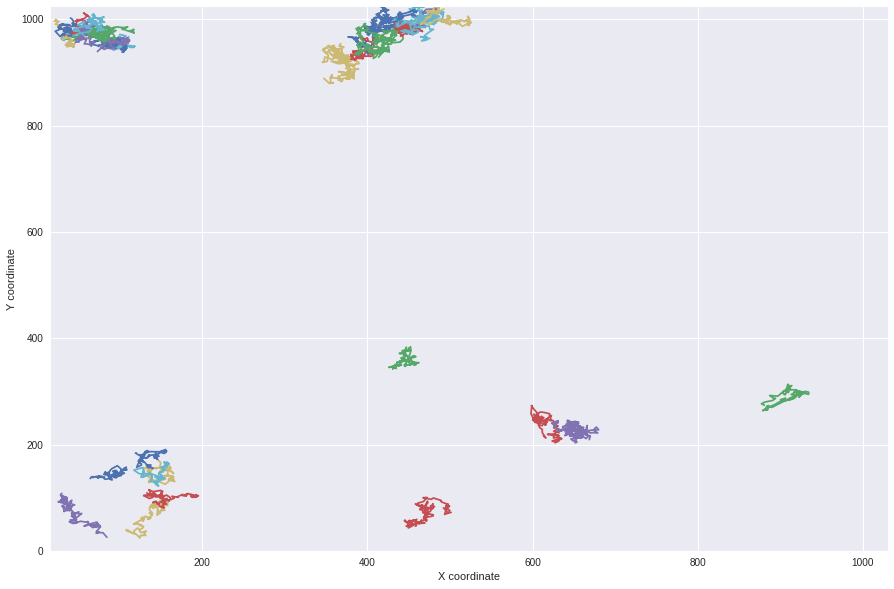

In [0]:
from collections import OrderedDict
import pandas as pd
import numpy as np
% matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patheffects

fn_tracks = '111018_tile9_spotStats.csv'

# import BridgeLib
# fn_tracks = 111018_tile9_spotStats.csv
spots_df = pd.read_csv(fn_tracks,
                       encoding='utf8')  # create spots data frame with saved data from TrackMate 
# tracks_df = pd.read_csv("/FakeTrackStats.csv", encoding='utf8')
# ltracks_df = pd.read_csv("/FakeLinksinTracks.csv", encoding='utf8')

# print spots_df.head(5)
# print "_________________________________________________________________________________________"
# print tracks_df.head(5)
# print "_________________________________________________________________________________________"
# print ltracks_df.head(5)

#Minimum number of spots in a track
numspots_min = 100

track_ids = spots_df['TRACK_ID']

x_min = np.min(spots_df['POSITION_X'])
x_max = np.max(spots_df['POSITION_X'])
y_min = np.min(spots_df['POSITION_Y'])
y_max = np.max(spots_df['POSITION_Y'])

# print "X MAX" + str(x_max)
# print "X MIN" + str(x_min)
# print "Y MAX" + str(y_max)
# print "Y MIN" + str(y_min)

# xyzt_position = spots_df['POSITION_X', 'POSITION_Y', 'POSITION_Z',  'POSITION_T']
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

uniqueTracks = spots_df['TRACK_ID'].unique()

index = np.argwhere(uniqueTracks == 'None') #Remove 'None'
uniqueTracks = np.delete(uniqueTracks, index)

for tracks in uniqueTracks:
  tmp_df = spots_df.loc[spots_df['TRACK_ID'] == tracks] #Too filthy
  if tmp_df.shape[0] >= numspots_min:
    ax.plot(tmp_df['POSITION_X'], tmp_df['POSITION_Y'], label=tracks)


ax.set_xlabel('X coordinate')
ax.set_ylabel('Y coordinate')

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

# ax.legend()  
plt.show()


## Rebuilding from 0,0
*Code is extremely hacked, needs polishing*

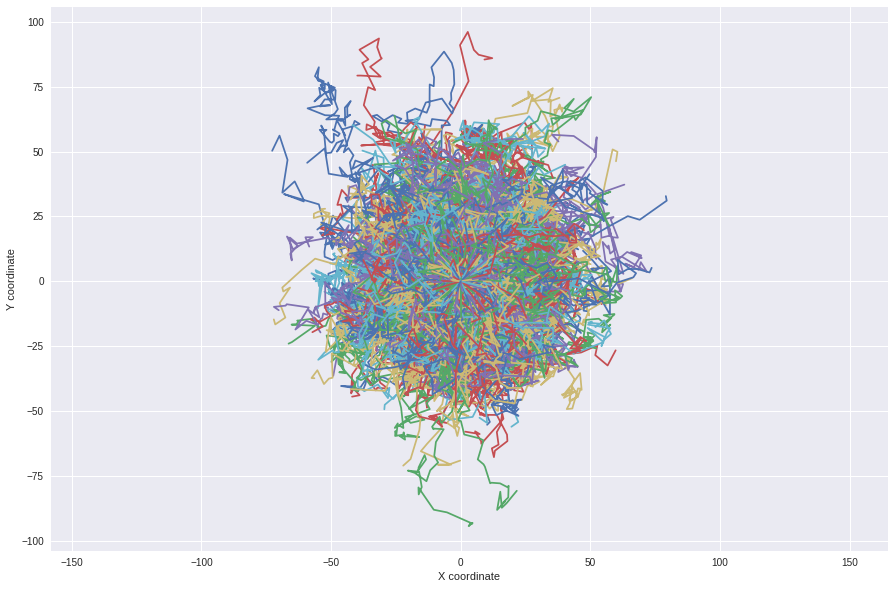

In [0]:
from collections import OrderedDict
import pandas as pd
import numpy as np
% matplotlib inline
import matplotlib.pyplot as plt

# import BridgeLib

spots_df = pd.read_csv("/111018_tile9_spotStats.csv",
                       encoding='utf8')  # create spots data frame with saved data from TrackMate 
# tracks_df = pd.read_csv("/FakeTrackStats.csv", encoding='utf8')
# ltracks_df = pd.read_csv("/FakeLinksinTracks.csv", encoding='utf8')

# print spots_df.head(5)
# print "_________________________________________________________________________________________"
# print tracks_df.head(5)
# print "_________________________________________________________________________________________"
# print ltracks_df.head(5)

track_ids = spots_df['TRACK_ID']

x_min = np.min(spots_df['POSITION_X'])
x_max = np.max(spots_df['POSITION_X'])
y_min = np.min(spots_df['POSITION_Y'])
y_max = np.max(spots_df['POSITION_Y'])

# print "X MAX" + str(x_max)
# print "X MIN" + str(x_min)
# print "Y MAX" + str(y_max)
# print "Y MIN" + str(y_min)

# xyzt_position = spots_df['POSITION_X', 'POSITION_Y', 'POSITION_Z',  'POSITION_T']
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
#

uniqueTracks = spots_df['TRACK_ID'].unique()

index = np.argwhere(uniqueTracks == 'None') #Remove 'None'
uniqueTracks = np.delete(uniqueTracks, index)

# for tracks in track_ids:
    
#     ax.plot(spots_df['POSITION_X'], spots_df['POSITION_Y'])

for tracks in uniqueTracks:
  tmp_df = spots_df.loc[spots_df['TRACK_ID'] == tracks] #Filthy
  tmp_x_pos = []
  tmp_y_pos = []
  
  initial_x = tmp_df.iloc[0, 4]
  initial_y = tmp_df.iloc[0, 5]

  for row in tmp_df['POSITION_X']:
    tmp_x_pos.append(row - initial_x)
  for row in tmp_df['POSITION_Y']:
    tmp_y_pos.append(row - initial_y)
  
#   print tmp_x_pos + tmp_y_pos
  ax.plot(tmp_x_pos, tmp_y_pos, label=tracks)
  
  
ax.set_xlabel('X coordinate')
ax.set_ylabel('Y coordinate')

ax.set_xlim(-x_max, x_max)
ax.set_ylim(-y_max, y_max)

# center_spines()
plt.axis('equal')
plt.show()


In [0]:
########################
#PLAYGROUND CELL       #
########################

spots_df.head()
spots_df.loc[ 0 , 'POSITION_X' ]

for tracks in uniqueTracks:
  tmp_df = spots_df.loc[spots_df['TRACK_ID'] == tracks] 
  tmp_y_pos = []
  
  initial_x = tmp_df.iloc[0, 4]
  initial_y = tmp_df.iloc[0, 5]
  
#   print initial_x
#   print initial_y
#   print tmp_df.head()
  for row in tmp_df['POSITION_X']:    #Getting worse
    tmp_x_pos.append(row - initial_x)
  for row in tmp_df['POSITION_Y']:
    tmp_y_pos.append(row - initial_y)
  
#   print tmp_x_pos + tmp_y_pos
  ax.plot(tmp_x_pos, tmp_y_pos, label=tracks)
  
  
ax.set_xlabel('X coordinate')
ax.set_ylabel('Y coordinate')

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

# center_spines()
plt.axis('equal')
ax.legend()
plt.show()



## Quick Gaussian tutorial
Hopefully will tweak this to work on our data-set

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [0]:
# Generate some data
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

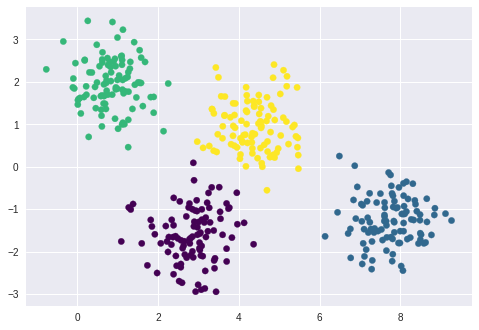

In [0]:
# Plot the data with K Means Labels
from sklearn.cluster import KMeans
kmeans = KMeans(4, random_state=0)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [0]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))


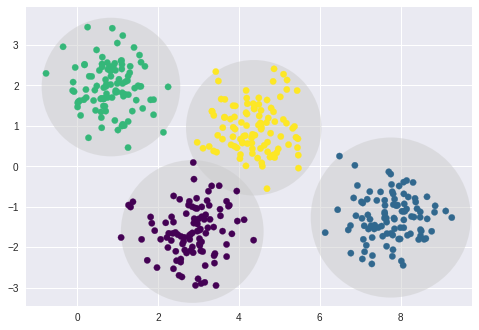

In [0]:
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X)

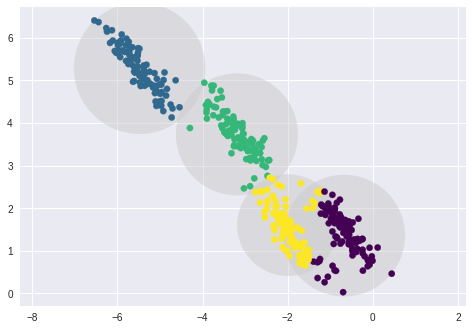

In [0]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X_stretched)

## Generalizing E–M: Gaussian Mixture Models

Errors out for whatever reason: \\
ImportError: cannot import name GMM \\
Can't seem to fix it by installing/re-installing appropriate packages



In [0]:
from sklearn.mixture import GMM
gmm = GMM(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

ImportError: ignored

In [0]:
probs = gmm.predict_proba(X) #Can't do the next two cells without the previous part
print(probs[:5].round(3))

In [0]:
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size);

In [0]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covars_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

## Gaussian on our data/K-means

In [0]:
#Imports, again
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

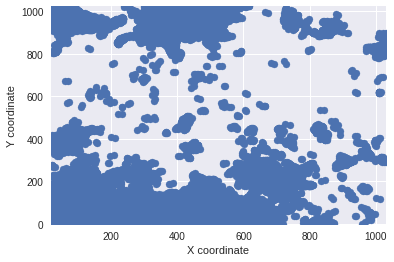

In [0]:
from collections import OrderedDict
import pandas as pd
import numpy as np
% matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patheffects

fn_tracks = '/content/111018_tile9_spotStats.csv'

spots_df = pd.read_csv(fn_tracks,
                       encoding='utf8')  # create spots data frame with saved data from TrackMate 

track_ids = spots_df['TRACK_ID']

x_min = np.min(spots_df['POSITION_X'])
x_max = np.max(spots_df['POSITION_X'])
y_min = np.min(spots_df['POSITION_Y'])
y_max = np.max(spots_df['POSITION_Y'])

# With track colours

# uniqueTracks = spots_df['TRACK_ID'].unique()
# index = np.argwhere(uniqueTracks == 'None') #Remove 'None'
# uniqueTracks = np.delete(uniqueTracks, index)
# ax=plt.gca()
# for tracks in uniqueTracks:
#   tmp_df = spots_df.loc[spots_df['TRACK_ID'] == tracks] #Too filthy
#   ax.scatter(tmp_df['POSITION_X'], tmp_df['POSITION_Y'])

# No Track colours
ax=plt.gca()
spots_df= spots_df.mask(spots_df['TRACK_ID'].eq('None')).dropna()
ax.scatter(spots_df['POSITION_X'], spots_df['POSITION_Y'])

    
ax.set_xlabel('X coordinate')
ax.set_ylabel('Y coordinate')

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

# ax.legend()  
plt.show()


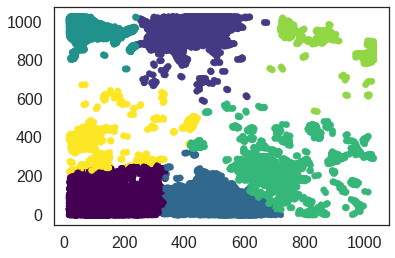

In [0]:
# Plot the data with K Means Labels
from sklearn.cluster import KMeans

spots_df= spots_df.mask(spots_df['TRACK_ID'].eq('None')).dropna()
spot_coords = spots_df[['POSITION_X','POSITION_Y']]

kmeans = KMeans(7, random_state=0)
labels = kmeans.fit(spot_coords).predict(spot_coords)


plt.scatter(spot_coords['POSITION_X'], spot_coords['POSITION_Y'], c=labels, s=40, cmap='viridis');

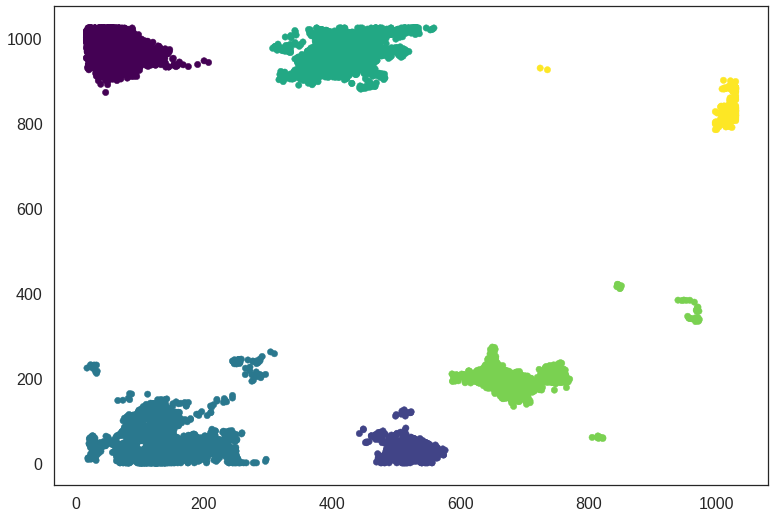

In [0]:
# Plot the data with K Means Labels for a smaller sample

from sklearn.cluster import KMeans

spots_df= spots_df.mask(spots_df['TRACK_ID'].eq('None')).dropna()
small_df = spots_df.loc[spots_df['FRAME'] <= 240]
spot_coords = small_df[['POSITION_X','POSITION_Y','FRAME']]


kmeans = KMeans(6, random_state=0)
labels = kmeans.fit(spot_coords).predict(spot_coords)

plt.scatter(spot_coords['POSITION_X'], spot_coords['POSITION_Y'], c=labels, s=40, cmap='viridis');


..         ...         ...    ...      ...
    POSITION_X  POSITION_Y  FRAME  cluster
1      343.917    1006.439    0.0        3
2      634.489     200.151    0.0        4
3      124.445      35.456    0.0        2
4      155.501      56.585    0.0        2
2      634.489     200.151    0.0        4
3      124.445      35.456    0.0        2
4      155.501      56.585    0.0        2
5      497.444      59.978    0.0        1

[5 rows x 4 columns]
...           ...         ...    ...      ...
       POSITION_X  POSITION_Y  FRAME  cluster
21343     128.577      35.405  240.0        2
21344     158.596      32.791  240.0        2
21345     107.402      32.510  240.0        2
21346    1014.677     815.096  240.0        5
21344     158.596      32.791  240.0        2
21345     107.402      32.510  240.0        2
21346    1014.677     815.096  240.0        5
21347     521.463    1021.574  240.0        3

[5 rows x 4 columns]


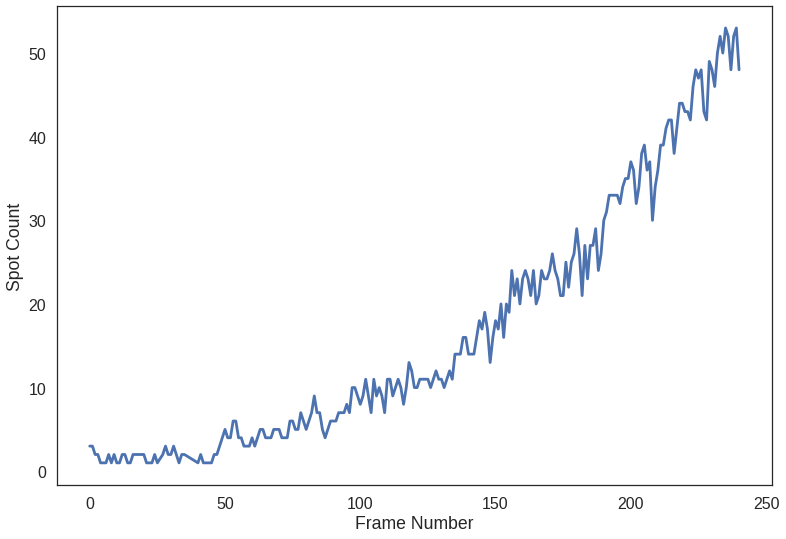

       POSITION_X
...           ...
FRAME            
0.0             3
1.0             3
2.0             2
3.0             2
4.0             1
5.0             1
6.0             1
7.0             2
8.0             1
9.0             2
10.0            1
11.0            1
12.0            2
13.0            2
14.0            1
15.0            1
16.0            2
17.0            2
18.0            2
19.0            2
20.0            2
21.0            1
23.0            1
24.0            2
25.0            1
27.0            2
28.0            3
29.0            2
30.0            2
31.0            3
32.0            2
33.0            1
34.0            2
35.0            2
40.0            1
41.0            2
42.0            1
44.0            1
45.0            1
46.0            2
47.0            2
48.0            3
49.0            4
50.0            5
51.0            4
52.0            4
53.0            6
54.0            6
55.0            4
56.0            4
57.0            3
58.0            3
59.0      

In [0]:
# print spot_coords.head()
# spot_coords['labels'] = labels #This solution gives a warning that can be avoided
spot_coords = spot_coords.assign(cluster=labels)
# print spot_coords.tail()

unique_clusters = spot_coords['cluster'].unique()

# for cluster in unique_clusters:
#   print spot_coords.loc[spot_coords['cluster'] == cluster].head()
#   print spot_coords.loc[spot_coords['cluster'] == cluster].set_index(["FRAME", "cluster"]).count(level="FRAME")


# spot_coords.set_index(["FRAME", "cluster"]).count(level="FRAME")
count_in_frame = spot_coords.loc[spot_coords['cluster'] == 2].set_index(["FRAME", "cluster","POSITION_Y"]).count(level="FRAME")
# print count_in_frame


plt.plot(count_in_frame.index.values, count_in_frame['POSITION_X'])

plt.xlabel('Frame Number')
plt.ylabel('Spot Count')

# plt.xlim(0, 120)

plt.show()


#   if spot_coords['cluster'] == 0:
#     print row
# print spot_coords.loc[spot_coords['cluster'] == 0]

# print clustering.labels_

# print spot_coords.keys()
# print clustering 

# plt.scatter(spot_coords['POSITION_X'], spot_coords['POSITION_Y'], c=labels, s=40, cmap='viridis');
pd.set_option('display.max_rows', -1)
print count_in_frame

In [0]:

# print spot_coords.head()
# spot_coords['labels'] = labels #This solution gives a warning that can be avoided
spot_coords = spot_coords.assign(cluster=labels)
# print spot_coords.tail()

unique_clusters = spot_coords['cluster'].unique() #Maybe order the clusters as well

# for cluster in unique_clusters:
#   print spot_coords.loc[spot_coords['cluster'] == cluster].head()
#   print spot_coords.loc[spot_coords['cluster'] == cluster].set_index(["FRAME", "cluster"]).count(level="FRAME")


def count_plot(cluster):
  # spot_coords.set_index(["FRAME", "cluster"]).count(level="FRAME")
  count_in_frame = spot_coords.loc[spot_coords['cluster'] == cluster].set_index(["FRAME", "cluster","POSITION_Y"]).count(level="FRAME")
  # print count_in_frame


  plt.plot(count_in_frame.index.values, count_in_frame['POSITION_X'])

  plt.xlabel('Frame Number')
  plt.ylabel('Spot Count')
  plt.title('Spot count for cluster ' + str(cluster))
  
  # plt.xlim(0, 120)

  plt.show()
  
for cluster in unique_clusters:
  count_plot(cluster)
  


  
  
#   if spot_coords['cluster'] == 0:
#     print row
# print spot_coords.loc[spot_coords['cluster'] == 0]

# print clustering.labels_

# print spot_coords.keys()
# print clustering 

# plt.scatter(spot_coords['POSITION_X'], spot_coords['POSITION_Y'], c=labels, s=40, cmap='viridis');

ValueError: ignored

## Lets try Spectral?

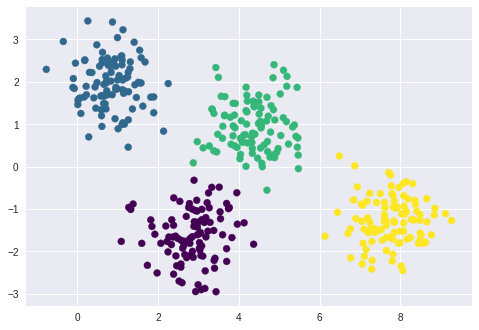

In [0]:
from sklearn.cluster import SpectralClustering
import numpy as np

# Generate some data
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

clustering = SpectralClustering(n_clusters=4,
        assign_labels="discretize",
        random_state=0).fit(X)

# print clustering.labels_

# print clustering 

plt.scatter(X[:,0], X[:,1], c=clustering.labels_, cmap='viridis')

In [0]:
from collections import OrderedDict
import pandas as pd
import numpy as np
% matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patheffects

fn_tracks = 'content/111018_tile9_spotStats.csv'

spots_df = pd.read_csv(fn_tracks,
                       encoding='utf8')  # create spots data frame with saved data from TrackMate 

spots_df = spots_df.loc[spots_df['FRAME'] <= 120] #6h cut-off

track_ids = spots_df['TRACK_ID']

x_min = np.min(spots_df['POSITION_X'])
x_max = np.max(spots_df['POSITION_X'])
y_min = np.min(spots_df['POSITION_Y'])
y_max = np.max(spots_df['POSITION_Y'])

# With track colours

# uniqueTracks = spots_df['TRACK_ID'].unique()
# index = np.argwhere(uniqueTracks == 'None') #Remove 'None'
# uniqueTracks = np.delete(uniqueTracks, index)
# ax=plt.gca()
# for tracks in uniqueTracks:
#   tmp_df = spots_df.loc[spots_df['TRACK_ID'] == tracks] #Too filthy
#   ax.scatter(tmp_df['POSITION_X'], tmp_df['POSITION_Y'])

# No Track colours
ax=plt.gca()
spots_df= spots_df.mask(spots_df['TRACK_ID'].eq('None')).dropna()
ax.scatter(spots_df['POSITION_X'], spots_df['POSITION_Y'])

    
ax.set_xlabel('X coordinate')
ax.set_ylabel('Y coordinate')

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

# ax.legend()  
plt.show()

In [0]:
from sklearn.cluster import SpectralClustering
import numpy as np

spots_df= spots_df.mask(spots_df['TRACK_ID'].eq('None')).dropna()
small_df = spots_df.loc[spots_df['FRAME'] <= 60]
spot_coords = small_df[['POSITION_X','POSITION_Y']]

clustering = SpectralClustering(n_clusters=6).fit(spot_coords)
#         assign_labels="discretize",
#         random_state=0)
data
# print clustering.labels_

# print clustering 


plt.scatter(spot_coords['POSITION_X'], spot_coords['POSITION_Y'], c=clustering.labels_, cmap='viridis');

## DBSCAN?
Really elaborate example

Automatically created module for IPython interactive environment
Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.883
Silhouette Coefficient: 0.626


/usr/local/lib/python2.7/dist-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


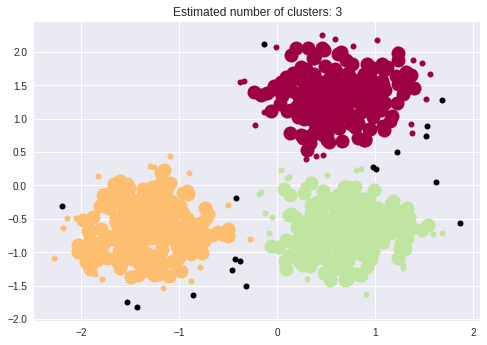

In [0]:
print(__doc__)

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()


[-1  0  0  1  0  2  3  1  0  3  2  3 -1  0  0  3  0  3  1  0  0  0  2  1
  1  2  2  1  1  3  1  1  0  1  0  2  3  1  3  1  0  2  3  1  3  2  3  3
  3  2  2  2  0  2  2  0  1  3 -1 -1  3  3  3  3  1  0  3 -1  0 -1  0  1
  0  2  3  0  1  0 -1  0  0  1  3  2  1  0  0  1  0  3  0  3  1  0 -1  2
  1  3  3  3  2  3  1  1  0  2  1  2  3  0  0  0  1  0  2  3  2  0  2  2
  3  0  3  2  1  2  3  3  3  1  2  2  2  0  1  0  2  1  2  0  1  0 -1  2
  0  3  1  0  3  0  3  1  3  1  2  0  3  0  0  0  1 -1  2  0  0  2  3  3
  0  2  2  2  2  3  3  3  1  0  1  2  1  2  0  1  2  0  2  1  1  2  1  1
  2  0  2  2  2 -1  3  1  1  0  3  3  2  1  0  2  1  2  1  1  3  3  2  3
  1  2  3  2  0  1  2  0  0  0  3  2  1  2  1  0  1  1  2 -1  0  3  1  0
  3  1  1  2  3  1  2  1  3  0 -1  3  0  1  2  2  1  1  3  2  1  0  0  0
  2  1  1  1  1  1  3  1  1  2  0 -1  2  3  3  3  2  3  3  2  2  2  3  1
  3  1  3  0  1  3  0  1  3  3  1 -1  2  2  1  2  3  3  1  2  2  3  3  1
  2  1  3  1  3  2  0  0  3  0  1  0  0  2  0  2  3

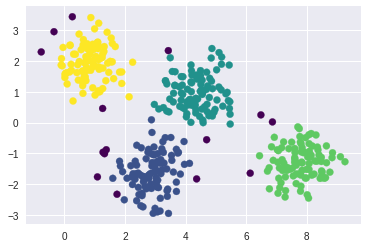

In [0]:
#Simpler example
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn.datasets.samples_generator import make_blobs

X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

clustering = DBSCAN().fit(X)


print clustering.labels_
print clustering 

plt.scatter(X[:,0], X[:,1], c=clustering.labels_, cmap='viridis')

[-1 -1 -1 ... -1 -1 -1]
DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=None, p=None)


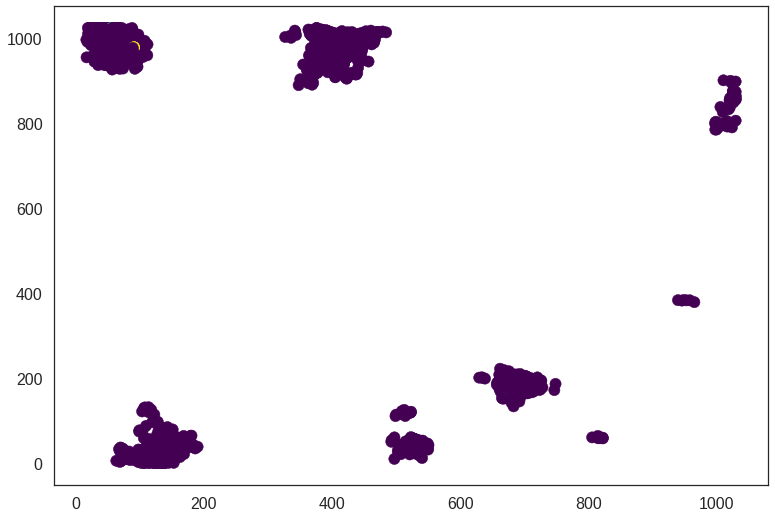

In [0]:
#Simpler example
from sklearn.cluster import DBSCAN
import numpy as np

spots_df= spots_df.mask(spots_df['TRACK_ID'].eq('None')).dropna()
small_df = spots_df.loc[spots_df['FRAME'] <= 120]
spot_coords = small_df[['POSITION_X','POSITION_Y']]

clustering = DBSCAN().fit(spot_coords)


print clustering.labels_
print clustering 

plt.scatter(spot_coords['POSITION_X'], spot_coords['POSITION_Y'], c=clustering.labels_, cmap='viridis');

## Ward?

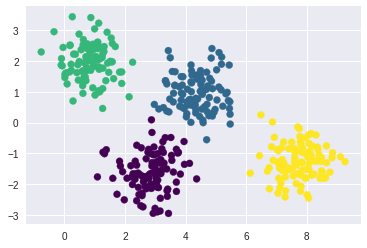

In [0]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from sklearn.datasets.samples_generator import make_blobs

X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

clustering = AgglomerativeClustering(n_clusters=4).fit(X)

# print clustering 
# print clustering.labels_

plt.scatter(X[:,0], X[:,1], c=clustering.labels_, cmap='viridis')

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=8,
            pooling_func='deprecated')
[1 3 2 ... 0 1 6]


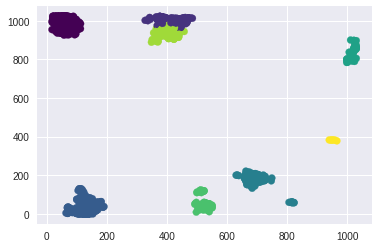

In [0]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

spots_df= spots_df.mask(spots_df['TRACK_ID'].eq('None')).dropna()
small_df = spots_df.loc[spots_df['FRAME'] <= 120]
spot_coords = small_df[['POSITION_X','POSITION_Y']]

clustering = AgglomerativeClustering(n_clusters=8).fit(spot_coords)

print clustering 
print clustering.labels_

plt.scatter(spot_coords['POSITION_X'], spot_coords['POSITION_Y'], c=clustering.labels_, cmap='viridis');

In [0]:
spots_df= spots_df.mask(spots_df['TRACK_ID'].eq('None')).dropna()
spot_coords = spots_df[['POSITION_X','POSITION_Y']]
print spots_df.loc[spots_df['FRAME'] <= 120].tail()


           Label          ID TRACK_ID  QUALITY  POSITION_X  POSITION_Y  \
4121  ID11928403  11928403.0      200    6.682     537.540      44.392   
4122  ID11939139  11939139.0      357    5.491     421.798     951.090   
4123  ID11939136  11939136.0      400    4.962      96.015     950.674   
4124  ID11939660  11939660.0      397    3.398     412.708     989.462   
4125  ID11938632  11938632.0      307    8.341     404.250     915.063   

      POSITION_Z  POSITION_T  FRAME  RADIUS  ...    MANUAL_COLOR  \
4121         0.0       120.0  120.0     3.5  ...     -10921639.0   
4122         0.0       120.0  120.0     3.5  ...     -10921639.0   
4123         0.0       120.0  120.0     3.5  ...     -10921639.0   
4124         0.0       120.0  120.0     3.5  ...     -10921639.0   
4125         0.0       120.0  120.0     3.5  ...     -10921639.0   

      MEAN_INTENSITY  MEDIAN_INTENSITY  MIN_INTENSITY  MAX_INTENSITY  \
4121          16.623              11.0            3.0           56.0   
41

## Gompertz 
Fitting a Gompertz probability distribution function to the growth rate



/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


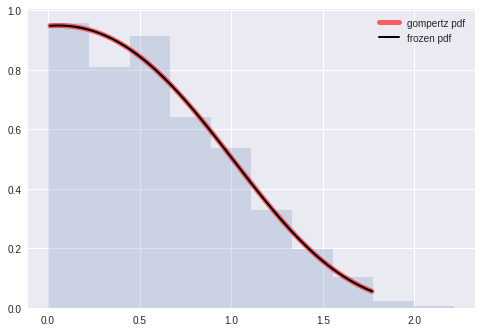

In [0]:
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
from scipy.stats import gompertz
import matplotlib.pyplot as plt
import numpy as np


# gompertz.pdf(x, c) = c * exp(x) * exp(-c*(exp(x)-1))
fig, ax = plt.subplots(1, 1)

c = 0.947437130751
mean, var, skew, kurt = gompertz.stats(c, moments='mvsk')

x = np.linspace(gompertz.ppf(0.01, c),
              gompertz.ppf(0.99, c), 100)
ax.plot(x, gompertz.pdf(x, c),
         'r-', lw=5, alpha=0.6, label='gompertz pdf')

rv = gompertz(c)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

vals = gompertz.ppf([0.001, 0.5, 0.999], c)
np.allclose([0.001, 0.5, 0.999], gompertz.cdf(vals, c))

r = gompertz.rvs(c, size=1000)

ax.hist(r, normed=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()


In [0]:
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np

spot_coords = spot_coords.assign(cluster=labels)
# print spot_coords

unique_clusters = spot_coords['cluster'].unique()


count_in_frame = spot_coords.loc[spot_coords['cluster'] == 2].set_index(["FRAME", "cluster","POSITION_Y"]).count(level="FRAME")





T = count_in_frame.index.values

def gompertz(T, A, u, d):
    """Gompertz growth model.
    A = ymax - y0
    u = 1+growth rate
    d - x = lambda - t
    Proposed in Zwietering et al., 1990 (PMID: 16348228)
    """
    y = A * np.exp(-np.exp( (u * np.exp(1) / A * (d - T)) + 1))
    return y
  

x = spot_coords['POSITION_X']
y = spot_coords['POSITION_Y']


params = curve_fit(gompertz, x, y)

[a, b, c] = params[0]
# print params
print [a,b,c]
  
# F = @(p,T) A *exp(-exp(p(2)*exp(1)/A*(p(3)-T)+1)); %Gompertz model with a constant
# %F = @(p,T) p(1) + exp(exp(-p(2)*(p(3)-T))); %Gompertz model with a constant

 
# x0=[1,0.1,5];
# XX=[Nmin:1:NN]'-Nmin;
# [phat,resnorm,residual,exitflag,output,lambda,jacobian]=lsqcurvefit(F,x0,XX,N);
# plot(XX,F(phat,XX),'r')
# phat


# def fit_func(x, a, b):
#     return b-a*np.log(x)

# params = curve_fit(fit_func, x, y)
# [a, b] = params[0]

x = np.linspace(0,240,241)
  
yy = gompertz(x,a,b,c)


# plt.scatter(count_in_frame.index.values, count_in_frame['POSITION_X'], marker='.')
# plt.plot(x,yy)  
# plt.xlabel('Frame Number')
# plt.ylabel('Spot Count')

# plt.show()


[631.2926483747797, 13.563815771469546, -776.6124331492592]


/usr/local/lib/python2.7/dist-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


(array([1., 1.]), array([[inf, inf],
       [inf, inf]]))
[1.0, 1.0]


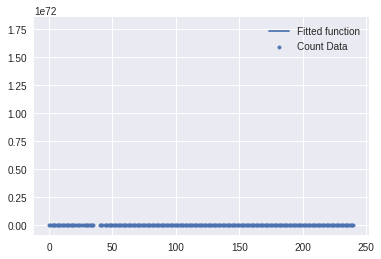

In [0]:
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np

spot_coords = spot_coords.assign(cluster=labels)
# print spot_coords

unique_clusters = spot_coords['cluster'].unique()


count_in_frame = spot_coords.loc[spot_coords['cluster'] == 2].set_index(["FRAME", "cluster","POSITION_Y"]).count(level="FRAME")

x = count_in_frame.index.values #All frames

def simpleLogistic(x, p1, p2):
    y = p1 * 2**(p2*x)
    return y
  

xpos = spot_coords['POSITION_X']
ypos = spot_coords['POSITION_Y']


params = curve_fit(simpleLogistic, xpos, ypos)

[a, b] = params[0]
print params
print [a,b]
  
# F = @(p,T) A *exp(-exp(p(2)*exp(1)/A*(p(3)-T)+1)); %Gompertz model with a constant
# %F = @(p,T) p(1) + exp(exp(-p(2)*(p(3)-T))); %Gompertz model with a constant

 
# x0=[1,0.1,5];
# XX=[Nmin:1:NN]'-Nmin;
# [phat,resnorm,residual,exitflag,output,lambda,jacobian]=lsqcurvefit(F,x0,XX,N);
# plot(XX,F(phat,XX),'r')
# phat


# def fit_func(x, a, b):
#     return b-a*np.log(x)

# params = curve_fit(fit_func, x, y)
# [a, b] = params[0]


# plt.scatter(count_in_frame.index.values, count_in_frame['POSITION_X'], marker='.')
# plt.plot(xspace,yy)  
# plt.xlabel('Frame Number')
# plt.ylabel('Spot Count')

plt.figure(figsize=(6, 4))
plt.scatter(count_in_frame.index.values, count_in_frame['POSITION_X'], marker='.', label='Count Data')
plt.plot(simpleLogistic(frame, a, b),
         label='Fitted function')

plt.legend(loc='best')

plt.show()


# plt.show()

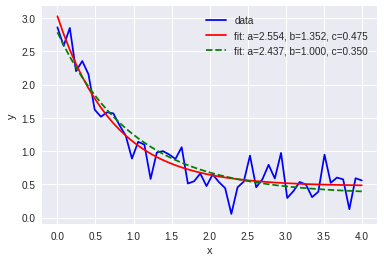

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

  
xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
np.random.seed(1729)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='data')


popt, pcov = curve_fit(func, xdata, ydata)
popt

plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))


popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))
popt

plt.plot(xdata, func(xdata, *popt), 'g--',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()



## New HDBSCAN
Hopefully this works

In [0]:
import hdbscan
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib as mpl

from scipy.spatial.distance import cdist

%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()

plot_kwds={'alpha':0.25, 's':60, 'linewidths':0}
palette = sns.color_palette('deep', 12)

data = np.load('/content/clusterable_data.npy')
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(data.T[0], data.T[1], **plot_kwds)
ax.set_xticks([])
ax.set_yticks([]);

IOError: ignored

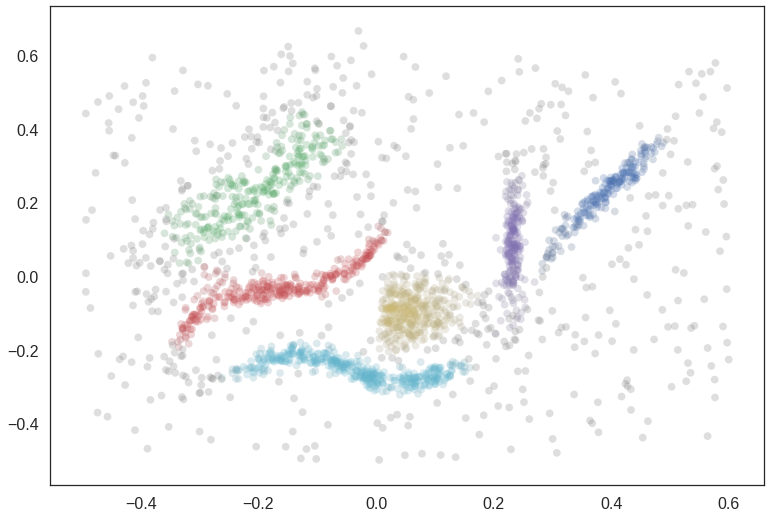

In [0]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=15).fit(data)


pal = sns.color_palette('deep', 8)
colors = [sns.desaturate(pal[col], sat) for col, sat in zip(clusterer.labels_,
                                                            clusterer.probabilities_)]
plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds);

## HDBSCAN on our Data

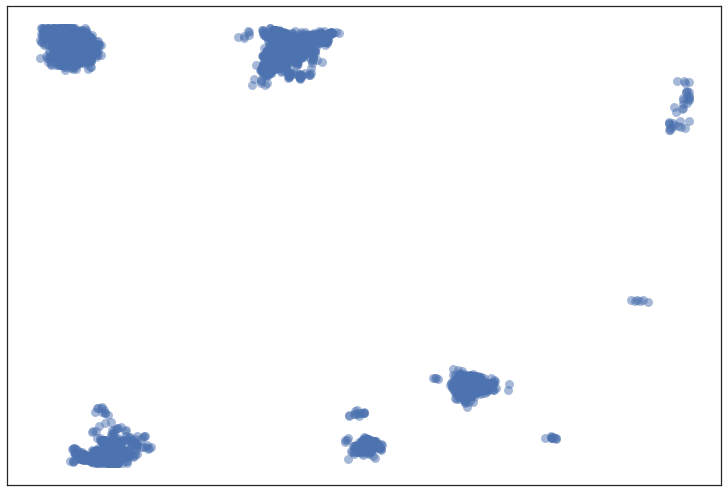

In [0]:
import hdbscan
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib as mpl
from scipy.spatial.distance import cdist
from sklearn import datasets
from sklearn.manifold import TSNE


%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}

palette = sns.color_palette('deep', 12)

spots_df= spots_df.mask(spots_df['TRACK_ID'].eq('None')).dropna()
small_df = spots_df.loc[spots_df['FRAME'] <= 120]
spot_coords = small_df[['POSITION_X','POSITION_Y','FRAME']]

fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(spot_coords['POSITION_X'], spot_coords['POSITION_Y'], **plot_kwds);
ax.set_xticks([])
ax.set_yticks([]);


[-1  0  1  2  3  4  5  6  7  8  9]


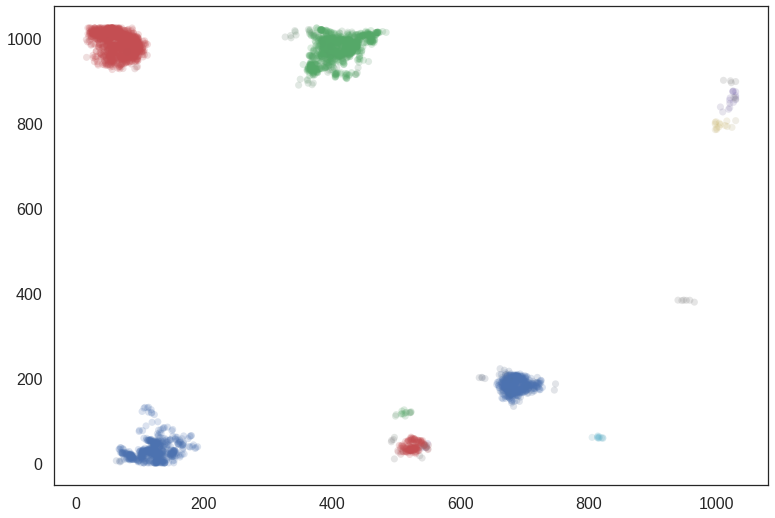

In [0]:
# clusterer = hdbscan.HDBSCAN(min_cluster_size=14, gen_min_span_tree=True)
# # clusterer.fit(test_data)
# clusterer.fit(spot_coords)

# # clusterer = hdbscan.HDBSCAN(min_cluster_size=14).fit(spot_coords)
# pal = sns.color_palette('deep')
# colors = [sns.desaturate(pal[col], sat) for col, sat in zip(clusterer.labels_,
#                                                             clusterer.probabilities_)]

# plt.scatter(spot_coords['POSITION_X'], spot_coords['POSITION_Y'], c=colors, **plot_kwds);




# clusterer = hdbscan.HDBSCAN(min_cluster_size=6, gen_min_span_tree=True)
# clusterer.fit(spot_coords)
# plt.scatter(spot_coords['POSITION_X'], spot_coords['POSITION_Y'], c=colors, **plot_kwds);
clusterer = hdbscan.HDBSCAN(min_cluster_size=6, prediction_data=True)
clusterer.fit(spot_coords)
# min_cluster = 6
# while min_cluster < 10:
#   try:
#     clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster, prediction_data=True)
#     clusterer.fit(spot_coords)
#   except:
#     min_cluster += 1
#     continue
#   else:
#     break
    

color_palette = sns.color_palette('deep', 12)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(spot_coords['POSITION_X'], spot_coords['POSITION_Y'],s=50, linewidth=0, c=cluster_member_colors, alpha=0.2);


# print (len(clusterer.labels_.unique()))
clusterLabels = clusterer.labels_
print (np.unique(clusterLabels))

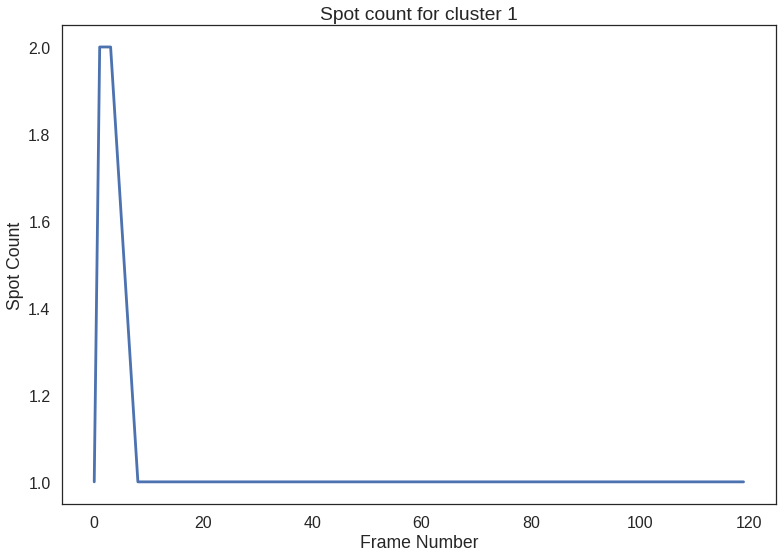

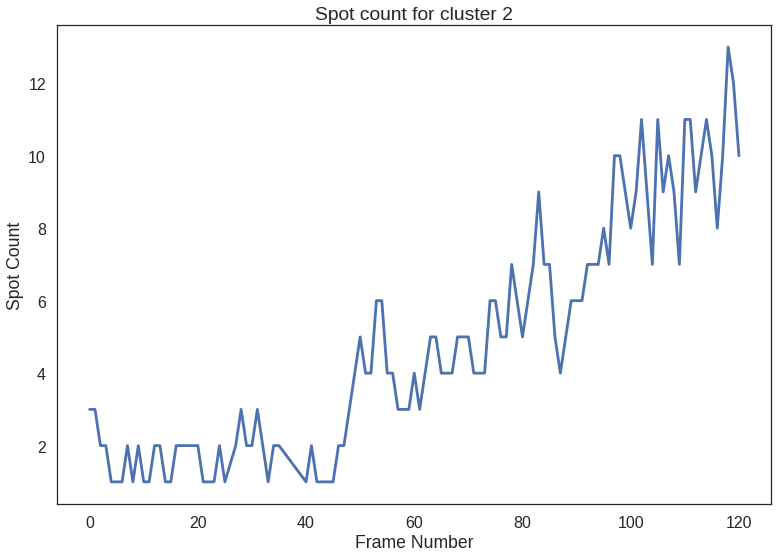

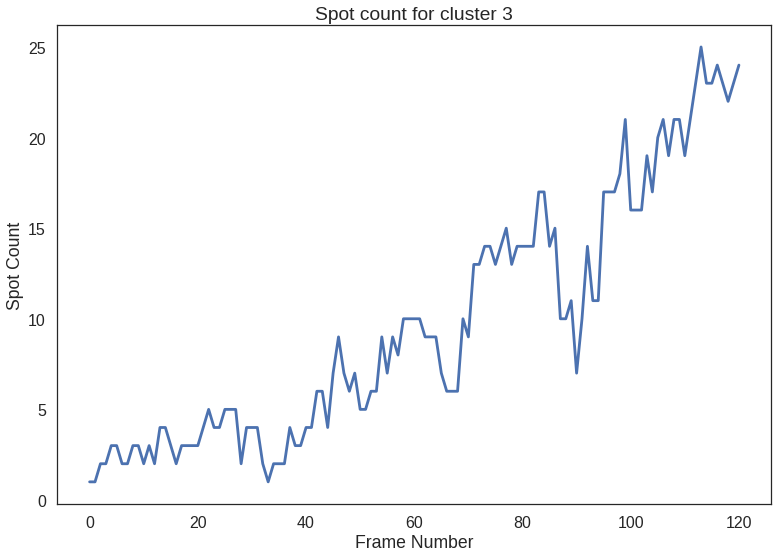

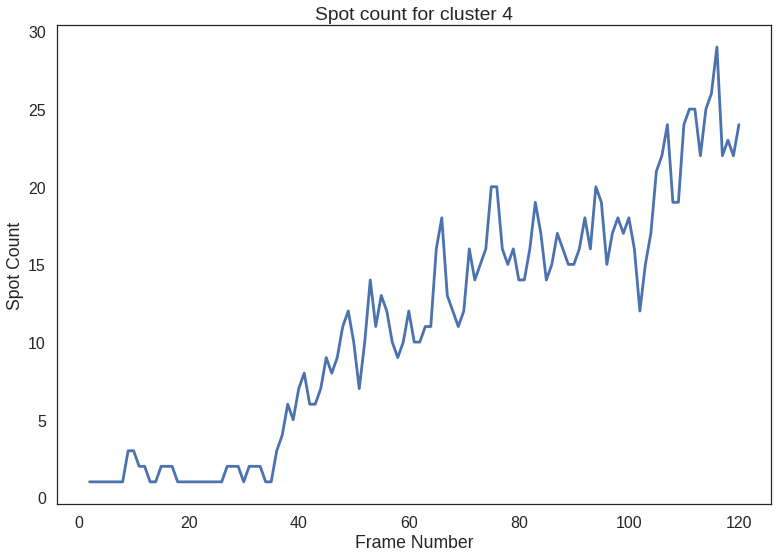

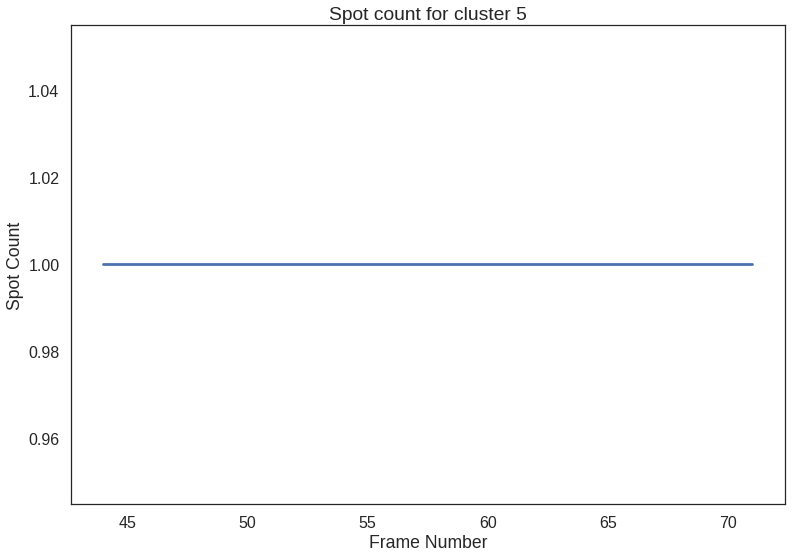

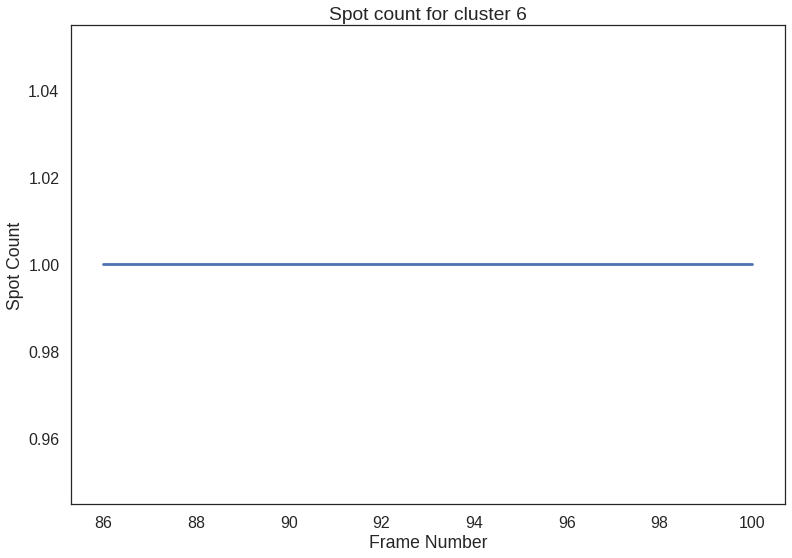

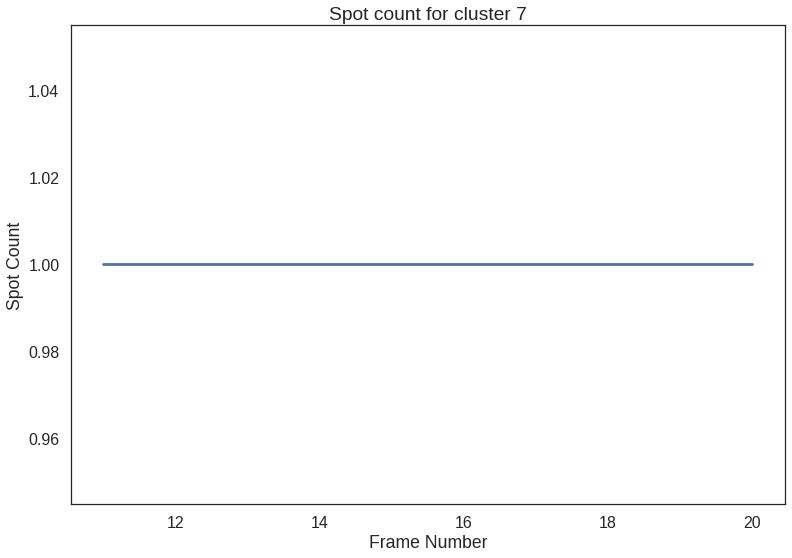

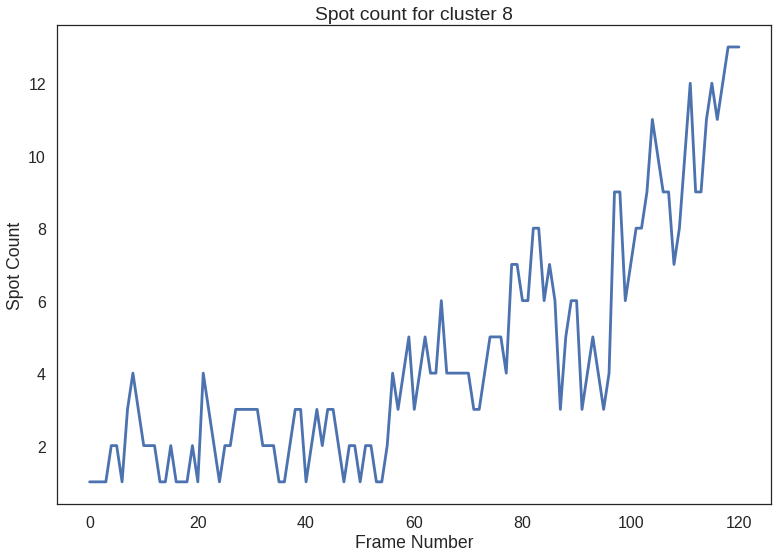

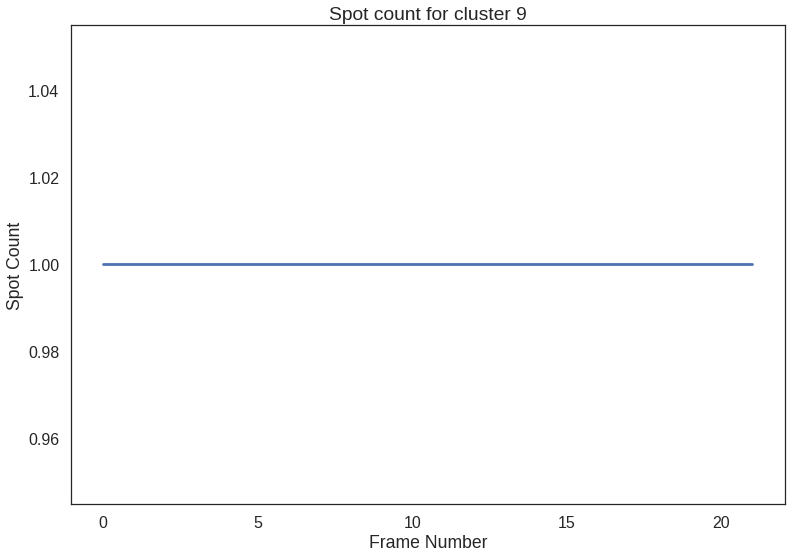

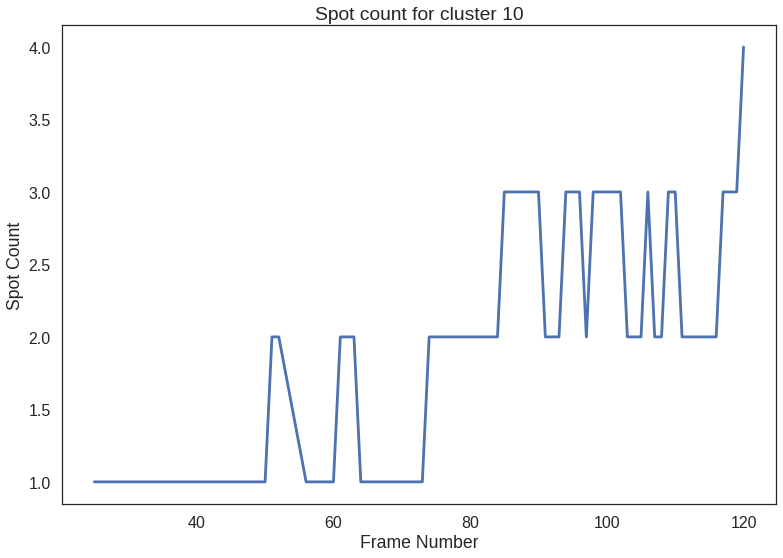

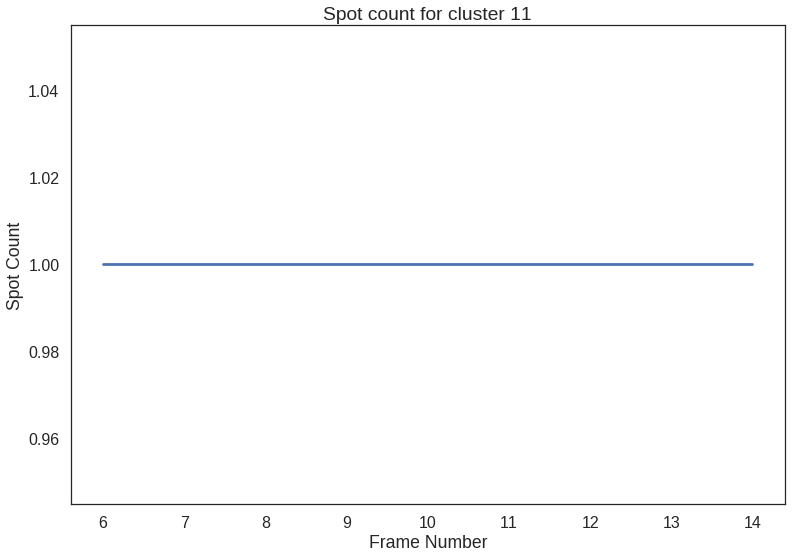

In [0]:
# print spot_coords.head()
# spot_coords['labels'] = labels #This solution gives a warning that can be avoided
spot_coords = spot_coords.assign(cluster=clusterer.labels_)
# print spot_coords.tail()
unique_clusters = np.unique(clusterer.labels_) #Maybe order the clusters as well

# for cluster in unique_clusters:
#   print spot_coords.loc[spot_coords['cluster'] == cluster].head()
#   print spot_coords.loc[spot_coords['cluster'] == cluster].set_index(["FRAME", "cluster"]).count(level="FRAME")


def count_plot(cluster):
  # spot_coords.set_index(["FRAME", "cluster"]).count(level="FRAME")
  count_in_frame = spot_coords.loc[spot_coords['cluster'] == cluster].set_index(["FRAME", "cluster","POSITION_Y"]).count(level="FRAME")
  # print count_in_frame


  plt.plot(count_in_frame.index.values, count_in_frame['POSITION_X'])

  plt.xlabel('Frame Number')
  plt.ylabel('Spot Count')
  plt.title('Spot count for cluster ' + str(cluster+2))
  plt.show()
  
for cluster in unique_clusters:
  count_plot(cluster)
  


  
  
#   if spot_coords['cluster'] == 0:
#     print row
# print spot_coords.loc[spot_coords['cluster'] == 0]

# print clustering.labels_

# print spot_coords.keys()
# print clustering 

# plt.scatter(spot_coords['POSITION_X'], spot_coords['POSITION_Y'], c=labels, s=40, cmap='viridis');

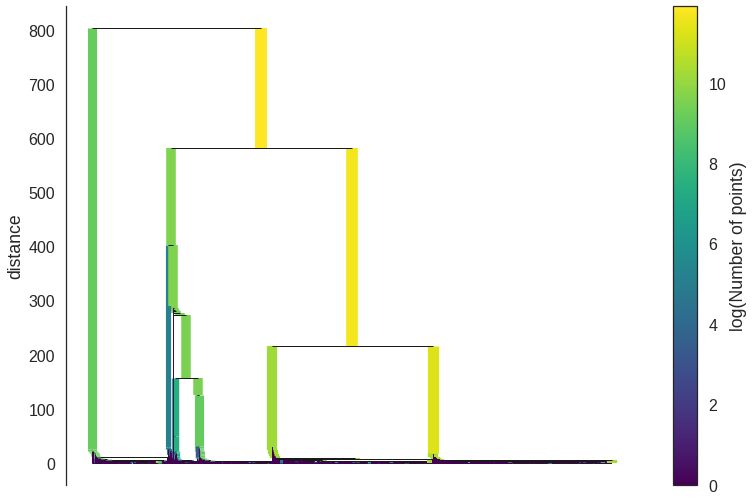

In [0]:
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

In [0]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


def f(x):
    return x

interact(f, x=10);


interactive(children=(IntSlider(value=10, description=u'x', max=30, min=-10), Output()), _dom_classes=(u'widge…

In [0]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def f(m, b):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, m * x + b)
    plt.ylim(-5, 5)
    plt.show()

interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description=u'm', max=2.0, min=-2.0), FloatSlider(value=0.0, desc…